In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('../data/raw_data.csv')

/tmp/ipykernel_57750/2458245178.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw_data.csv')


In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16641 entries, 0 to 16640
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   type                      16641 non-null  object 
 1   id                        16641 non-null  int64  
 2   url                       16641 non-null  object 
 3   twitterUrl                16641 non-null  object 
 4   text                      16641 non-null  object 
 5   source                    0 non-null      float64
 6   retweetCount              16641 non-null  int64  
 7   replyCount                16641 non-null  int64  
 8   likeCount                 16641 non-null  int64  
 9   quoteCount                16641 non-null  int64  
 10  viewCount                 16641 non-null  int64  
 11  createdAt                 16641 non-null  object 
 12  lang                      16641 non-null  object 
 13  bookmarkCount             16641 non-null  int64  
 14  isRepl

In [4]:
df.drop(columns=['type', 'url', 'twitterUrl', 'source', 'lang', 'bookmarkCount', 'inReplyToId', 'conversationId', 'inReplyToUserId', 'isPinned', 'author', 'extendedEntities', 'card', 'place', 'entities', 'reply_to_user_results', 'quoted_tweet_results', 'quoted_tweet', 'retweeted_tweet', 'isConversationControlled', 'searchTermIndex', 'isQuote', 'inReplyToUsername'])

,id,text,retweetCount,replyCount,likeCount,quoteCount,viewCount,createdAt,isReply,processed
0,1502024189821259782,Gabriel Boric se retiró de la Municipalidad de...,126,21,864,8,0,2022-03-10 20:50:47+00:00,False,True
1,1502066098333790213,Presidente electo Gabriel Boric llega a Cerro ...,105,39,1813,16,0,2022-03-10 23:37:19+00:00,False,True
2,1502234042749669379,"Hace 9 años atrás, el dirigente estudiantil Ga...",2245,96,6223,164,0,2022-03-11 10:44:40+00:00,False,True
3,1502240034774306820,"🇨🇱 Anos atrás, o líder estudantil Gabriel Bori...",68,5,424,15,0,2022-03-11 11:08:29+00:00,False,False
4,1502290076448870402,Lista nuestra primera foto oficial como Equipo...,7007,2412,49808,1160,0,2022-03-11 14:27:20+00:00,False,True
...,...,...,...,...,...,...,...,...,...,...
16636,1911832252545200596,Chile ya cuenta con un plan de acción con plaz...,2,0,9,1,987,2025-04-14 17:21:43+00:00,False,NaN
16637,1911834046654562358,Chile ya cuenta con un Plan de Acción para la ...,9,0,17,0,949,2025-04-14 17:28:51+00:00,False,NaN
16638,1911840128416235709,#ClaudiaSheinbaum | Otros gobiernos de América...,5,17,18,4,3958,2025-04-14 17:53:01+00:00,False,NaN
16639,1911841519654351248,Apostó por Anaya Cortes y ganó AMLO\nApostó po...,2,0,2,0,45,2025-04-14 17:58:33+00:00,False,NaN


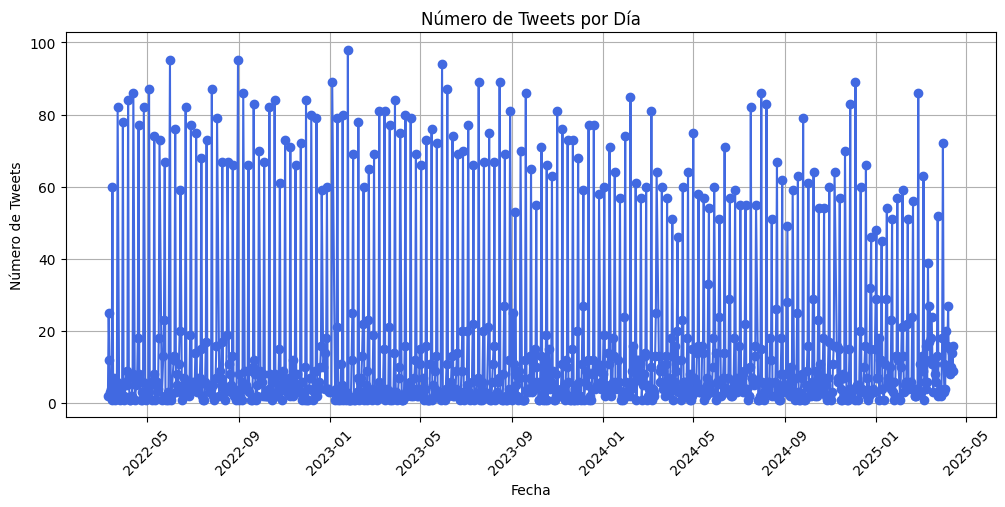

In [5]:
df["createdAt"] = pd.to_datetime(df["createdAt"])
tweets_per_day = df["createdAt"].dt.date.value_counts().sort_index()
plt.figure(figsize=(12, 5))
tweets_per_day.plot(kind="line", marker="o", color="royalblue")
plt.xlabel("Fecha")
plt.ylabel("Número de Tweets")
plt.title("Número de Tweets por Día")
plt.xticks(rotation=45)
plt.grid()
plt.show()

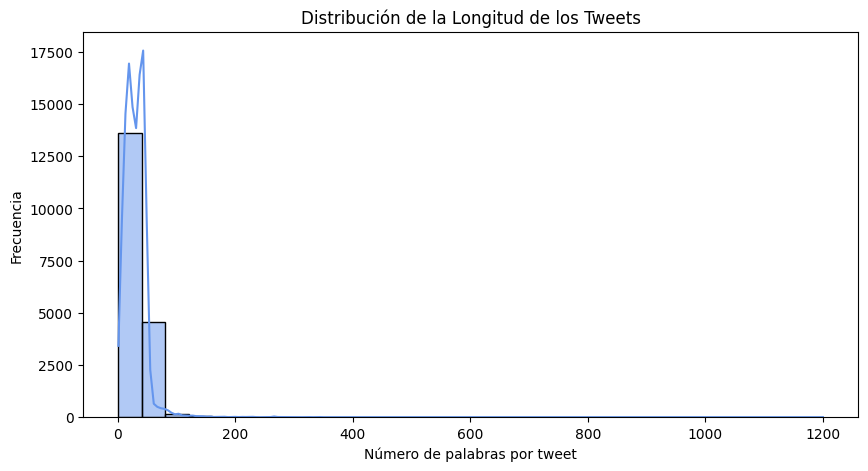

In [18]:
df["tweet_length"] = df["text"].astype(str).apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
sns.histplot(df["tweet_length"], bins=30, kde=True, color="cornflowerblue")
plt.xlabel("Número de palabras por tweet")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Longitud de los Tweets")
plt.show()

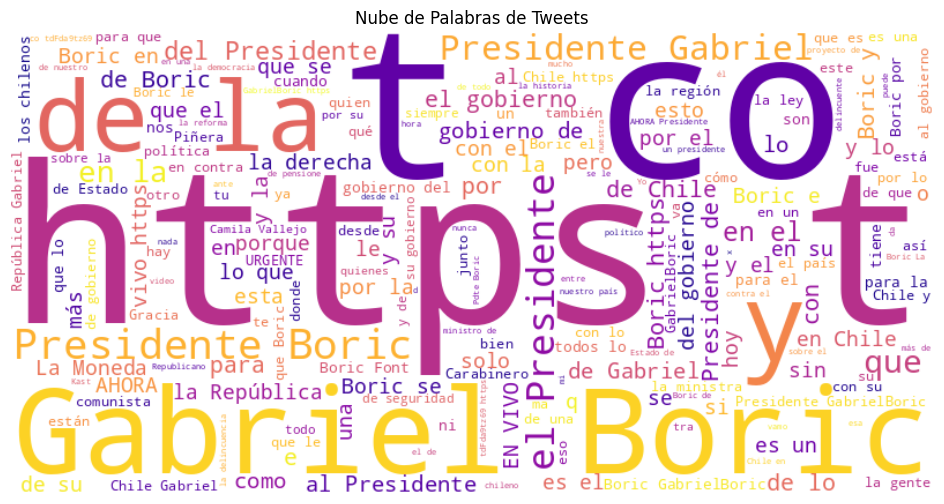

In [6]:
text = " ".join(df["text"].dropna())
text[:500]
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='plasma', max_words=200).generate(text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de Palabras de Tweets")
plt.show()

In [22]:
df = pd.read_csv('../data/features_dataset.csv')

In [23]:
df = df.dropna()
df.head()

,date,score_positive,score_negative,score_neutral,retweetCount,replyCount,likeCount,quoteCount,robertuito_0,robertuito_1,...,score_positive_lag_6,score_negative_lag_6,score_neutral_lag_6,score_positive_lag_7,score_negative_lag_7,score_neutral_lag_7,score_negative_rolling7,score_negative_rolling3,sentiment_net,sentiment_net_rolling7
11,2022-03-21,0.358458,0.196829,0.444713,149.000000,388.000000,526.750000,126.000000,0.135075,0.444441,...,0.025492,0.825355,0.149153,0.064808,0.581465,0.353727,0.484069,0.572186,0.161628,-0.332484
12,2022-03-22,0.184142,0.432754,0.383104,224.500000,164.000000,1137.333333,26.833333,0.386215,0.442125,...,0.109561,0.500938,0.389501,0.025492,0.825355,0.149153,0.427984,0.427765,-0.248612,-0.253734
13,2022-03-23,0.129118,0.451518,0.419365,63.907895,94.697368,726.697368,11.736842,0.162557,0.670268,...,0.243527,0.092264,0.664210,0.109561,0.500938,0.389501,0.420924,0.360367,-0.322400,-0.243880
14,2022-03-24,0.129118,0.451518,0.419365,63.907895,94.697368,726.697368,11.736842,0.162557,0.670268,...,0.286385,0.253372,0.460243,0.243527,0.092264,0.664210,0.472246,0.445263,-0.322400,-0.311546
15,2022-03-25,0.178047,0.500652,0.321301,193.000000,378.000000,577.500000,61.500000,0.157430,0.549981,...,0.012535,0.866016,0.121449,0.286385,0.253372,0.460243,0.507571,0.467896,-0.322605,-0.362349


In [24]:
def clasificar_sentimiento(row):
    scores = {
        "positivo": row["score_positive"],
        "negativo": row["score_negative"],
        "neutro": row["score_neutral"]
    }
    max_score = max(scores.values())
    
        # Manejo de empates: si hay más de un score con el mismo valor máximo
    candidatos = [k for k, v in scores.items() if v == max_score]
    if len(candidatos) > 1:
        return "neutro"  # asignamos neutro en caso de empate
    return candidatos[0]

In [25]:
df["sentimiento_clasificado"] = df.apply(clasificar_sentimiento, axis=1)

In [27]:
df.head()

,date,score_positive,score_negative,score_neutral,retweetCount,replyCount,likeCount,quoteCount,robertuito_0,robertuito_1,...,score_negative_lag_6,score_neutral_lag_6,score_positive_lag_7,score_negative_lag_7,score_neutral_lag_7,score_negative_rolling7,score_negative_rolling3,sentiment_net,sentiment_net_rolling7,sentimiento_clasificado
11,2022-03-21,0.358458,0.196829,0.444713,149.000000,388.000000,526.750000,126.000000,0.135075,0.444441,...,0.825355,0.149153,0.064808,0.581465,0.353727,0.484069,0.572186,0.161628,-0.332484,neutro
12,2022-03-22,0.184142,0.432754,0.383104,224.500000,164.000000,1137.333333,26.833333,0.386215,0.442125,...,0.500938,0.389501,0.025492,0.825355,0.149153,0.427984,0.427765,-0.248612,-0.253734,negativo
13,2022-03-23,0.129118,0.451518,0.419365,63.907895,94.697368,726.697368,11.736842,0.162557,0.670268,...,0.092264,0.664210,0.109561,0.500938,0.389501,0.420924,0.360367,-0.322400,-0.243880,negativo
14,2022-03-24,0.129118,0.451518,0.419365,63.907895,94.697368,726.697368,11.736842,0.162557,0.670268,...,0.253372,0.460243,0.243527,0.092264,0.664210,0.472246,0.445263,-0.322400,-0.311546,negativo
15,2022-03-25,0.178047,0.500652,0.321301,193.000000,378.000000,577.500000,61.500000,0.157430,0.549981,...,0.866016,0.121449,0.286385,0.253372,0.460243,0.507571,0.467896,-0.322605,-0.362349,negativo


In [34]:
total_por_dia = df.groupby('date')['sentimiento_clasificado'].count().reset_index(name='total')

In [35]:
total_por_dia.head()

,date,total
0,2022-03-21,1
1,2022-03-22,1
2,2022-03-23,1
3,2022-03-24,1
4,2022-03-25,1
